# MNIST Dataset

In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

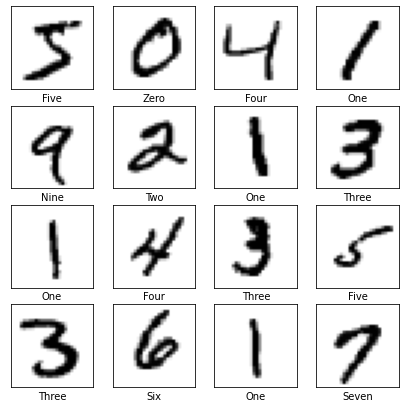

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (7,7) )

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])
plt.show()

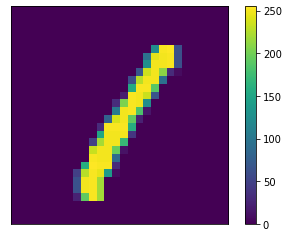

In [ ]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [ ]:
X_train, X_test = X_train/255,X_test/255

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(300, activation = 'sigmoid'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile ( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
results = model.fit ( X_train, y_train, epochs = 10, batch_size = 1000 )

Epoch 1/10
60/60 [==============================] - 2s 23ms/step - loss: 1.1642 - accuracy: 0.7299
Epoch 2/10
60/60 [==============================] - 1s 23ms/step - loss: 0.4888 - accuracy: 0.8825
Epoch 3/10
60/60 [==============================] - 2s 31ms/step - loss: 0.3738 - accuracy: 0.9021
Epoch 4/10
60/60 [==============================] - 2s 34ms/step - loss: 0.3239 - accuracy: 0.9117
Epoch 5/10
60/60 [==============================] - 1s 23ms/step - loss: 0.2942 - accuracy: 0.9184
Epoch 6/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2720 - accuracy: 0.9236
Epoch 7/10
60/60 [==============================] - 1s 23ms/step - loss: 0.2541 - accuracy: 0.9284
Epoch 8/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2394 - accuracy: 0.9326
Epoch 9/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2260 - accuracy: 0.9367
Epoch 10/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2129 - accuracy: 0.9396


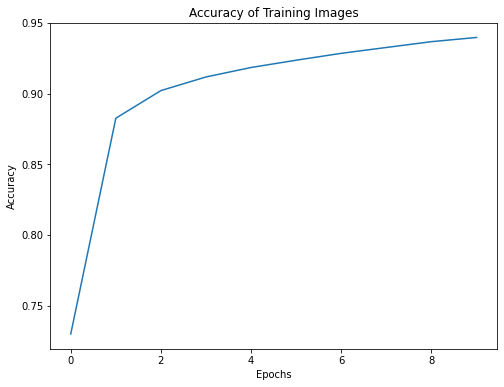

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(results.history['accuracy'])
plt.title("Accuracy of Training Images")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
y_pred = model.predict ( X_test )

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np

predicted_labels = np.argmax ( y_pred, axis = -1 ) 

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score ( y_test, predicted_labels )

In [ ]:
print(test_accuracy)

0.9404


#Changes in loss function and metrics

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(300, activation = 'sigmoid'),
  tf.keras.layers.Dense(100,activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_1.compile ( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
results_1 = model_1.fit ( X_train, y_train, epochs = 15, batch_size = 1500 )

Epoch 1/15
40/40 [==============================] - 3s 57ms/step - loss: 1.3196 - accuracy: 0.7063
Epoch 2/15
40/40 [==============================] - 1s 36ms/step - loss: 0.4655 - accuracy: 0.8802
Epoch 3/15
40/40 [==============================] - 1s 36ms/step - loss: 0.3338 - accuracy: 0.9054
Epoch 4/15
40/40 [==============================] - 1s 37ms/step - loss: 0.2901 - accuracy: 0.9164
Epoch 5/15
40/40 [==============================] - 1s 36ms/step - loss: 0.2635 - accuracy: 0.9233
Epoch 6/15
40/40 [==============================] - 1s 36ms/step - loss: 0.2433 - accuracy: 0.9293
Epoch 7/15
40/40 [==============================] - 1s 37ms/step - loss: 0.2257 - accuracy: 0.9350
Epoch 8/15
40/40 [==============================] - 2s 52ms/step - loss: 0.2117 - accuracy: 0.9392
Epoch 9/15
40/40 [==============================] - 2s 52ms/step - loss: 0.1964 - accuracy: 0.9435
Epoch 10/15
40/40 [==============================] - 1s 36ms/step - loss: 0.1831 - accuracy: 0.9477
Epoch 11/

In [ ]:
y_pred_1 = model_1.predict ( X_test )

313/313 [==============================] - 1s 3ms/step


In [ ]:
predicted_labels_1 = np.argmax ( y_pred_1, axis = -1 ) 

In [ ]:
print(accuracy_score ( y_test, predicted_labels_1 ))

0.9579


# Chinese Trafic Signs 

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
from google.colab import drive
drive.mount('//content/drive')

Mounted at //content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import zipfile
from zipfile import ZipFile
import os
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
trn_zip=ZipFile("/content/drive/MyDrive/train.zip","r")
trn_zip.extractall()

In [ ]:
len(os.listdir("train"))

25000

In [ ]:
data=[]
size=120
images=os.listdir("train")
train_pth="train"
for img in images:
    img_path=os.path.join(train_pth,img)
    if img.split(".")[0]=="cat":
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append([img_arr,0])
    else:
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append([img_arr,1])

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,0,1
0,"[[[10, 13, 11], [10, 13, 11], [11, 14, 12], [3...",0
1,"[[[112, 133, 135], [114, 135, 137], [114, 135,...",0
2,"[[[178, 159, 138], [177, 158, 137], [183, 164,...",1
3,"[[[101, 66, 41], [92, 58, 35], [89, 57, 36], [...",1
4,"[[[101, 131, 132], [104, 134, 134], [106, 136,...",0


In [ ]:
df.to_csv('df.csv')

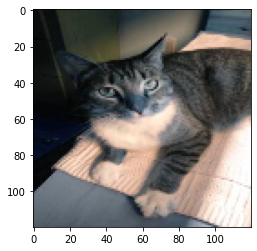

In [ ]:
plt.imshow(df[0][0])

In [ ]:
X=[]
y=[]

for arr in data:
    X.append(arr[0])
    y.append(arr[1])

X=np.array(X)
y=np.array(y)

In [ ]:
X.shape,y.shape

((25000, 120, 120, 3), (25000,))

In [ ]:
X =X/255

In [ ]:
X_train,X_test,y_train,y_test=X[:20000],X[20000:],y[:20000],y[20000:]

In [ ]:
model=keras.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(120,120,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))


# model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
# model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=128,activation="relu"))

model.add(layers.Dense(units=2,activation="softmax"))

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
print("Test Accuracy",model.evaluate(X_test,y_test))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()